# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [134]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [135]:
# 데이터셋 종류 : 
data = load_wine()

In [136]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [137]:
import pandas as pd
#df로 만들어주기
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df.shape

(178, 13)

In [138]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [139]:
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [140]:
input = data.data
output = data.target

In [141]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 

In [143]:
print(x_train[0])
print(y_train[0])

#input 13개 (속성이 13개)
#y의 class는 3개 (0,1,2)

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03])
tensor(0)


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [144]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [145]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

# 기본

In [89]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,200, bias=True), 
          nn.Sigmoid(),
          nn.Linear(200,100, bias=True),
          nn.Sigmoid(),
          nn.Linear(100,30, bias=True), 
          nn.Softmax()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [90]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,200, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(200)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(200,100, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(100,50, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(50, 30, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [91]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [92]:
model = Model().to(device)
model.apply(init_weights)

/var/folders/p1/fd2s37114219lyvgkk2dr5p00000gn/T/ipykernel_7656/2101624760.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=200, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)

In [93]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=200, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)


In [94]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [95]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/Users/ahn-youngji/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 3.4039580821990967
10 2.8822524547576904
20 2.7796554565429688
30 2.7932820320129395
40 2.762077808380127
50 2.7556958198547363
60 2.7481865882873535
70 2.774962902069092
80 2.77866792678833
90 2.7420706748962402


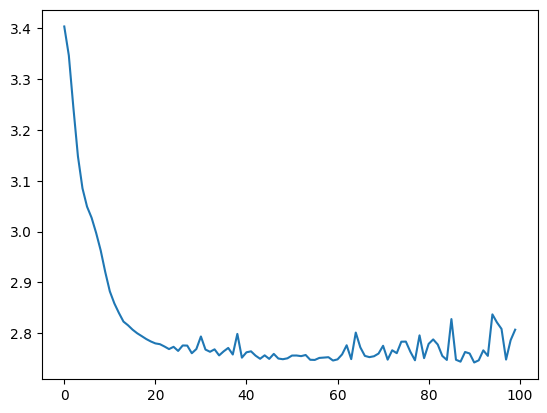

In [96]:
plt.plot(losses)
plt.show()

In [97]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [98]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [9.9993753e-01 3.4807854e-05 8.6543187e-06 9.4633168e-07 1.2792650e-06
 6.5591189e-07 2.9132298e-07 4.0766599e-07 9.4550177e-07 5.5719420e-07
 4.0005639e-07 2.7550082e-06 2.3122153e-07 3.3766543e-07 1.7737815e-06
 8.5083110e-07 5.0622532e-07 1.0245902e-07 4.3682820e-07 7.2044287e-07
 1.0584645e-06 8.8868609e-07 6.6873764e-07 4.9349609e-07 1.2168151e-06
 2.7528401e-07 2.9121713e-07 4.8836102e-07 2.0579394e-07 2.1897586e-07]
argmax를 한 후의 output은 0
accuracy는 0.6851851851851852


# 추가 - 하이퍼볼릭 탄젠트

In [146]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기 -> 4개

model = nn.Sequential(
          nn.Linear(13,512, bias=True), 
          nn.Tanh(),
          nn.Linear(512,256, bias=True),
          nn.Tanh(),
          nn.Linear(256,128, bias=True), 
          nn.Tanh(),
          nn.Linear(128,30, bias=True), 
          nn.Tanh()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [163]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,512, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(512)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(512,256, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(128, 64, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )
    self.layer5 = nn.Sequential(
        nn.Linear(64, 30, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    output = self.layer5(output)
    return output

In [164]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [165]:
model = Model().to(device)
model.apply(init_weights)

/var/folders/p1/fd2s37114219lyvgkk2dr5p00000gn/T/ipykernel_7656/2101624760.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=512, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Softmax(dim=None)
  )
  (layer5): Sequential(
    (0): Linear(in_features=64, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)

In [166]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=512, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Softmax(dim=None)
  )
  (layer5): Sequential(
    (0): Linear(in_features=64, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)


In [167]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [168]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/Users/ahn-youngji/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 3.4016385078430176
10 3.380699872970581
20 3.3569467067718506
30 3.3255844116210938
40 3.2813563346862793
50 3.2231698036193848
60 3.159208059310913
70 3.110602855682373
80 3.149052381515503
90 3.1363391876220703


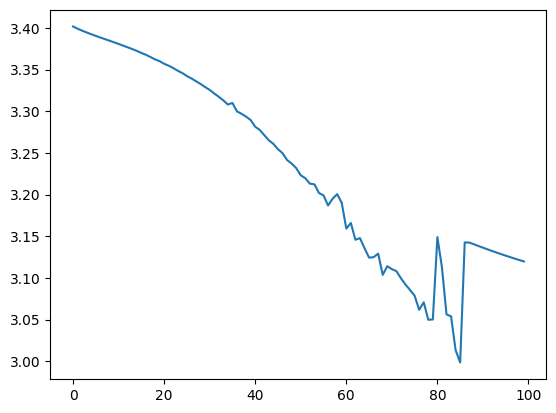

In [169]:
plt.plot(losses)
plt.show()

In [170]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [171]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.08965794 0.60079205 0.19496118 0.00518177 0.00431751 0.00398603
 0.00335084 0.00396256 0.00389412 0.00442019 0.00424472 0.00476188
 0.00510829 0.00477181 0.00346299 0.00443692 0.00437018 0.00403917
 0.00427984 0.00371627 0.00409524 0.00355946 0.00481831 0.00339382
 0.00457992 0.00383477 0.00378964 0.00416441 0.00534292 0.00470511]
argmax를 한 후의 output은 1
accuracy는 0.3888888888888889


# 추가 - relu

In [172]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기 -> 4개

model = nn.Sequential(
          nn.Linear(13,512, bias=True), 
          nn.ReLU(),
          nn.Linear(512,256, bias=True),
          nn.ReLU(),
          nn.Linear(256,128, bias=True), 
          nn.ReLU(),
          nn.Linear(128,30, bias=True), 
          nn.ReLU()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [173]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,512, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(512)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(512,256, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(128, 64, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )
    self.layer5 = nn.Sequential(
        nn.Linear(64, 30, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    output = self.layer5(output)
    return output

In [174]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [175]:
model = Model().to(device)
model.apply(init_weights)

/var/folders/p1/fd2s37114219lyvgkk2dr5p00000gn/T/ipykernel_7656/2101624760.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=512, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Softmax(dim=None)
  )
  (layer5): Sequential(
    (0): Linear(in_features=64, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)

In [176]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=512, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Softmax(dim=None)
  )
  (layer5): Sequential(
    (0): Linear(in_features=64, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)


In [177]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [180]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 3.056439161300659
10 3.1507861614227295
20 3.144289255142212
30 3.139563798904419
40 3.135915517807007
50 3.1329004764556885
60 3.1302237510681152
70 3.1276726722717285
80 3.125066041946411
90 3.1222281455993652


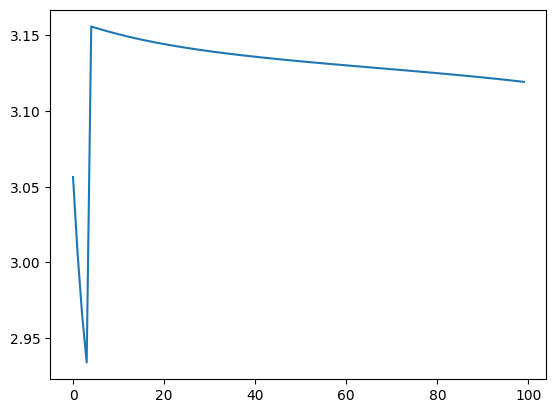

In [181]:
plt.plot(losses)
plt.show()

In [182]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [183]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.75826764 0.1522487  0.05795432 0.00104433 0.00093903 0.00111594
 0.00125618 0.0013728  0.00125912 0.00130686 0.00098515 0.00097609
 0.0012905  0.00119207 0.00131414 0.00144732 0.00098701 0.00133679
 0.0014377  0.0011393  0.00103407 0.00097243 0.00120884 0.00121253
 0.00116779 0.00119026 0.00094523 0.00095917 0.00149087 0.00094782]
argmax를 한 후의 output은 0
accuracy는 0.3333333333333333


# 추가 - softmax, optim.SGD

In [184]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,256, bias=True), 
          nn.Softmax(),
          nn.Linear(256,128, bias=True),
          nn.Softmax(),
          nn.Linear(128,30, bias=True), 
          nn.Softmax()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [185]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,256, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(256)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(128,64, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(64, 30, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [186]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [187]:
model = Model().to(device)
model.apply(init_weights)

/var/folders/p1/fd2s37114219lyvgkk2dr5p00000gn/T/ipykernel_7656/2101624760.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)

In [188]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)


In [189]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [190]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/Users/ahn-youngji/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 3.397538423538208
10 3.2308883666992188
20 3.1909406185150146
30 3.1907846927642822
40 3.1907734870910645
50 3.1907715797424316
60 3.190770387649536
70 3.1907706260681152
80 3.190770387649536
90 3.190770149230957


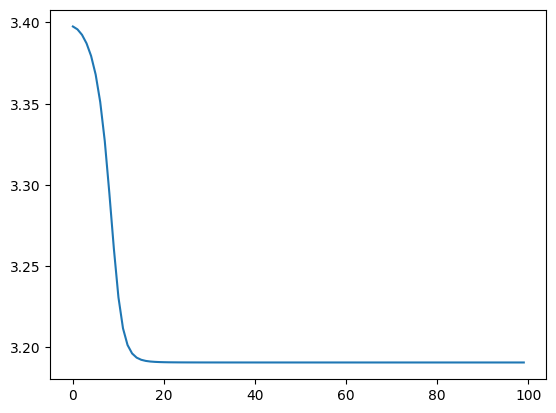

In [191]:
plt.plot(losses)
plt.show()

In [192]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [193]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [6.7312017e-06 2.0159143e-06 9.9994886e-01 2.6294410e-06 7.1597429e-07
 1.1355372e-06 1.7579797e-06 1.1484022e-06 1.6178287e-06 2.1300443e-06
 2.1615026e-06 1.2705400e-06 1.0259682e-06 2.0521663e-06 8.8926589e-07
 1.5059803e-06 1.5114622e-06 1.9025795e-06 1.4466760e-06 2.9244513e-06
 2.2699408e-06 1.2366338e-06 1.2333230e-06 1.7949246e-06 9.3716989e-07
 1.5393898e-06 1.3487205e-06 7.7507548e-07 1.5253025e-06 2.0076088e-06]
argmax를 한 후의 output은 2
accuracy는 0.2777777777777778


# 추가 -LeakyReLU

In [194]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,256, bias=True), 
          nn.LeakyReLU(0.1),
          nn.Linear(256,128, bias=True),
          nn.LeakyReLU(0.1),
          nn.Linear(128,30, bias=True), 
          nn.LeakyReLU(0.1)
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [195]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,256, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(256)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(128,64, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(64, 30, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [196]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [197]:
model = Model().to(device)
model.apply(init_weights)

/var/folders/p1/fd2s37114219lyvgkk2dr5p00000gn/T/ipykernel_7656/2101624760.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)

In [198]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)


In [199]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [200]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/Users/ahn-youngji/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 3.4061789512634277
10 3.3648135662078857
20 3.179713249206543
30 3.1293530464172363
40 3.1263933181762695
50 3.126290798187256
60 3.1262688636779785
70 3.126251459121704
80 3.1262478828430176
90 3.1262452602386475


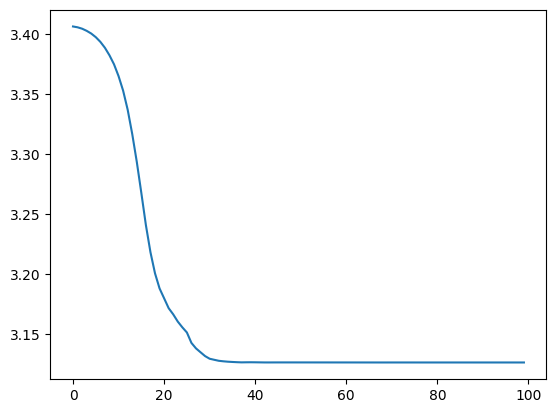

In [201]:
plt.plot(losses)
plt.show()

In [202]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [203]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [9.9753356e-01 5.6424691e-05 2.3463666e-03 2.6479929e-06 1.5457291e-06
 1.5157785e-06 2.8413260e-06 2.2147417e-06 2.7904118e-06 2.5605502e-06
 2.7248675e-06 9.3257052e-07 2.7414110e-06 2.5343174e-06 2.8684897e-06
 2.2706083e-06 3.2876421e-06 2.9694122e-06 2.9503810e-06 2.5904760e-06
 9.9803196e-07 1.6875626e-06 3.4077088e-06 3.1224824e-06 1.9090121e-06
 2.5017098e-06 2.2613763e-06 3.1536208e-06 1.8976581e-06 7.6802735e-07]
argmax를 한 후의 output은 0
accuracy는 0.3333333333333333


# < 3주차 과제 2 : CNN 맛보기>

In [51]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [52]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [68]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10) ### : 알맞는 input은?

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [69]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [70]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [71]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [72]:
for epoch in range(1, 10):
    train(epoch)
    test()

/var/folders/p1/fd2s37114219lyvgkk2dr5p00000gn/T/ipykernel_7656/3614070618.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311404
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.282385
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.272270
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.283599
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.244882
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.243810
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.224021
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.180104
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.133883
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.000395
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.908960
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.724348
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.442902
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.368001
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.836658
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.000611
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.944622
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.770986
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.691053
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.590902
Train Epoch: 1 [12800/60000 (

/var/folders/p1/fd2s37114219lyvgkk2dr5p00000gn/T/ipykernel_7656/2324877592.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/Users/ahn-youngji/opt/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1789, Accuracy: 9461/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.147459
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.271662
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.097170
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.140709
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.177205
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.162947
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.115464
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.159411
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.109070
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.113894
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.178128
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.115376
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.215620
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.126688
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.154639
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.167985
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.108231
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.162458
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.193228
Train Epoch: 2 [12

Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.143618
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.095141
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.166744
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.154825
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.113384
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.119755
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.023110
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.052308
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.060013
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.024437
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.113998
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.139287
Train Epoch: 3 [52480/60000 (87%)]	Loss: 0.058749
Train Epoch: 3 [53120/60000 (88%)]	Loss: 0.016190
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.055129
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.082572
Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.155689
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.112050
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.057220
Train Epoch: 3 [56960/60000 (95%)]	Loss: 0.146272


Train Epoch: 5 [29440/60000 (49%)]	Loss: 0.076069
Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.100739
Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.136815
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.096899
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.112540
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.030769
Train Epoch: 5 [33280/60000 (55%)]	Loss: 0.159698
Train Epoch: 5 [33920/60000 (57%)]	Loss: 0.041054
Train Epoch: 5 [34560/60000 (58%)]	Loss: 0.053540
Train Epoch: 5 [35200/60000 (59%)]	Loss: 0.116625
Train Epoch: 5 [35840/60000 (60%)]	Loss: 0.093449
Train Epoch: 5 [36480/60000 (61%)]	Loss: 0.104219
Train Epoch: 5 [37120/60000 (62%)]	Loss: 0.005993
Train Epoch: 5 [37760/60000 (63%)]	Loss: 0.053523
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.061993
Train Epoch: 5 [39040/60000 (65%)]	Loss: 0.025616
Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.032037
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.095352
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.030592
Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.040016


Train Epoch: 7 [14080/60000 (23%)]	Loss: 0.073684
Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.052219
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.005527
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.009464
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.015656
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.168283
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.040140
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.015166
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.030318
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.055628
Train Epoch: 7 [20480/60000 (34%)]	Loss: 0.069828
Train Epoch: 7 [21120/60000 (35%)]	Loss: 0.027395
Train Epoch: 7 [21760/60000 (36%)]	Loss: 0.065768
Train Epoch: 7 [22400/60000 (37%)]	Loss: 0.022756
Train Epoch: 7 [23040/60000 (38%)]	Loss: 0.175265
Train Epoch: 7 [23680/60000 (39%)]	Loss: 0.015371
Train Epoch: 7 [24320/60000 (41%)]	Loss: 0.009835
Train Epoch: 7 [24960/60000 (42%)]	Loss: 0.032273
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.025689
Train Epoch: 7 [26240/60000 (44%)]	Loss: 0.018373


Train Epoch: 8 [58880/60000 (98%)]	Loss: 0.013488
Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.031605

Test set: Average loss: 0.0583, Accuracy: 9814/10000 (98%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.062731
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.029435
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.041122
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.034270
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.068686
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.100475
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.058737
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.029493
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.062991
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.066994
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.067537
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.030228
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.100859
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.032499
Train Epoch: 9 [8960/60000 (15%)]	Loss: 0.049198
Train Epoch: 9 [9600/60000 (16%)]	Loss: 0.030849
Train Epoch: 9 [10240/60000 (17%)]	Loss: 0.082994
Train Epoch: 9 [10